In [ ]:
from google.colab import files

# Opens a file upload dialog
uploaded = files.upload()


Saving era5_gadanki_2021.csv to era5_gadanki_2021.csv


In [ ]:
import pandas as pd

df = pd.read_csv("era5_gadanki_2021.csv")
print(df.head())  # Display first few rows


                  time       u10        d2m        t2m         msl         sp  \
0  2021-07-01 00:00:00  1.026276  296.11810  299.89935  100529.250  97575.190   
1  2021-07-01 01:00:00  1.162537  296.11730  300.14362  100580.690  97626.250   
2  2021-07-01 02:00:00  1.374207  296.66888  301.40875  100606.625  97652.625   
3  2021-07-01 03:00:00  1.696823  296.68286  301.78473  100666.310  97718.250   
4  2021-07-01 04:00:00  1.912949  296.76970  302.04620  100695.440  97752.310   

          cbh       tcc      tclw  
0   1428.8335  0.901306  0.005432  
1   4052.6372  0.977966  0.003235  
2   9454.9060  0.914093  0.002380  
3   9845.4000  0.959259  0.003265  
4  10913.6880  0.960754  0.024536  


In [ ]:
import pandas as pd

# Load dataset
file_path = "era5_gadanki_2021.csv"
df = pd.read_csv(file_path)

# Convert "time" column to datetime format
df["time"] = pd.to_datetime(df["time"])

# Extract only the date (ignoring time)
df["date"] = df["time"].dt.date

# Compute daily mean for all numeric columns
daily_mean_df = df.groupby("date").mean().reset_index()

# Save to a new CSV file
daily_mean_df.to_csv("daily_mean_data.csv", index=False)

print("✅ Daily mean data saved as 'daily_mean_data.csv'!")


✅ Daily mean data saved as 'daily_mean_data.csv'!


In [ ]:
import pandas as pd

# Load dataset
file_path = "era5_gadanki_2021.csv"
df = pd.read_csv(file_path)

# Convert "time" column to datetime and extract only the date
df["time"] = pd.to_datetime(df["time"])
df["date"] = df["time"].dt.date

# Drop the "time" column
df = df.drop(columns=["time"])

# Compute daily mean for all numeric columns
daily_mean_df = df.groupby("date").mean().reset_index()

# Save to a new CSV file
daily_mean_df.to_csv("daily_mean_data.csv", index=False)

print("✅ 'daily_mean_data.csv' saved successfully without the 'time' column!")


✅ 'daily_mean_data.csv' saved successfully without the 'time' column!


In [ ]:
from google.colab import files
files.download("daily_mean_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Opens a file upload dialog
uploaded = files.upload()

Saving daily_mean_data (1).csv to daily_mean_data (1).csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the daily mean dataset
file_path = "daily_mean_data.csv"
df = pd.read_csv(file_path)

# Keep the "date" column separately
date_column = df["date"]
df = df.drop(columns=["date"])  # Remove "date" for normalization

# Apply Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# Add back the "date" column
normalized_df.insert(0, "date", date_column)

# Save the normalized data to a new CSV file
normalized_df.to_csv("normalized_daily_mean_data.csv", index=False)

print("✅ 'normalized_daily_mean_data.csv' saved successfully with values scaled between 0 and 1!")


✅ 'normalized_daily_mean_data.csv' saved successfully with values scaled between 0 and 1!


In [ ]:
from google.colab import files
files.download("normalized_daily_mean_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the dataset
file_path = "updated_normalized_data.csv"  # Ensure the file exists
df = pd.read_csv(file_path)

# Ensure 'date' column is in the correct format (YYYY-MM-DD)
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%Y-%m-%d")

# List of dates where thunderstorms occurred (format should match dataset)
thunderstorm_dates = [
    "2021-07-02", "2021-07-09", "2021-07-14", "2021-07-18",
    "2021-10-07", "2021-10-24",
    "2021-11-07", "2021-11-11", "2021-11-18", "2021-11-21"
]

# Create 'thunderstorm_occurred' column with default 0
df["thunderstorm_occurred"] = 0

# Assign 1 to rows where date is in thunderstorm_dates
df.loc[df["date"].isin(thunderstorm_dates), "thunderstorm_occurred"] = 1

# Save the updated dataset
df.to_csv("updated_normalized_data.csv", index=False)

# Google Colab Download Code
from google.colab import files
files.download("updated_normalized_data.csv")

print("✅ Thunderstorm occurrences updated & file is ready for download!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Thunderstorm occurrences updated & file is ready for download!


In [ ]:
from google.colab import files

# Opens a file upload dialog
uploaded = files.upload()

Saving updated_normalized_data.csv to updated_normalized_data (1).csv


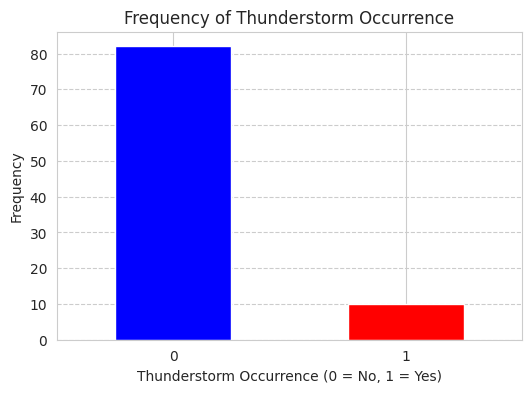

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences
thunderstorm_counts = df["thunderstorm_occurred"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
thunderstorm_counts.plot(kind="bar", color=["blue", "red"])
plt.xlabel("Thunderstorm Occurrence (0 = No, 1 = Yes)")
plt.ylabel("Frequency")
plt.title("Frequency of Thunderstorm Occurrence")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--")
plt.show()


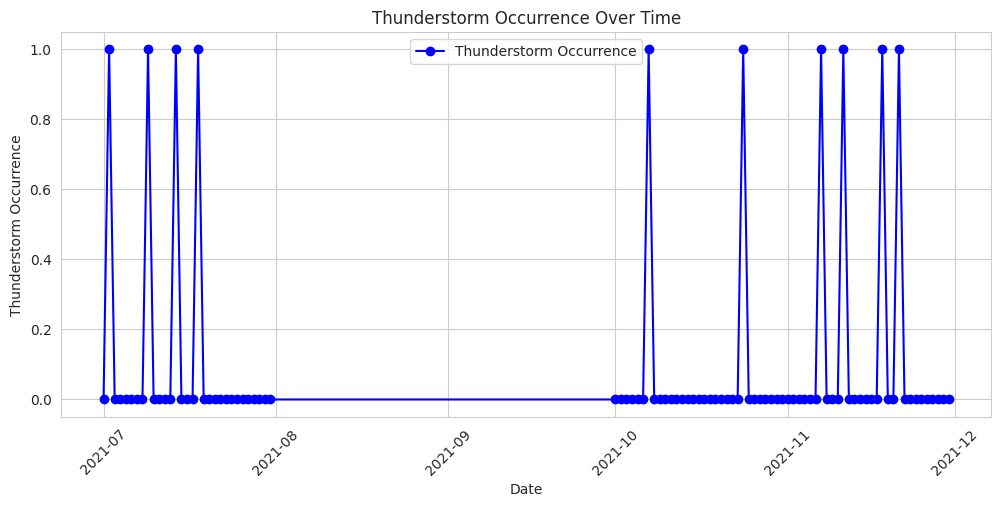

In [ ]:
import matplotlib.pyplot as plt

# Ensure date is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Plot thunderstorm occurrences
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["thunderstorm_occurred"], marker="o", linestyle="-", color="b", label="Thunderstorm Occurrence")

# Formatting
plt.xlabel("Date")
plt.ylabel("Thunderstorm Occurrence")
plt.title("Thunderstorm Occurrence Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


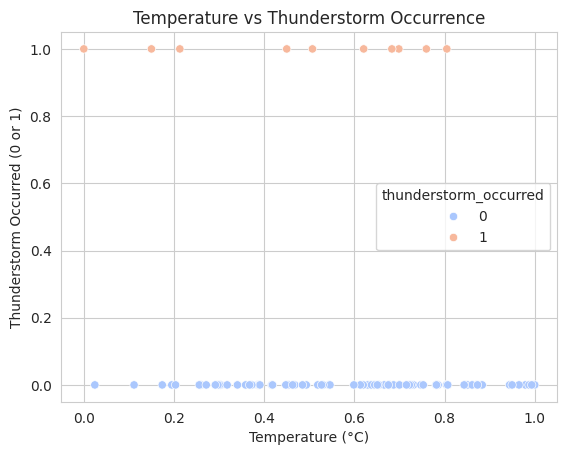

In [ ]:
# Scatter plot of temperature vs. thunderstorm occurrence
sns.scatterplot(data=df, x='t2m', y='thunderstorm_occurred', hue='thunderstorm_occurred', palette="coolwarm")
plt.title('Temperature vs Thunderstorm Occurrence')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thunderstorm Occurred (0 or 1)')
plt.show()


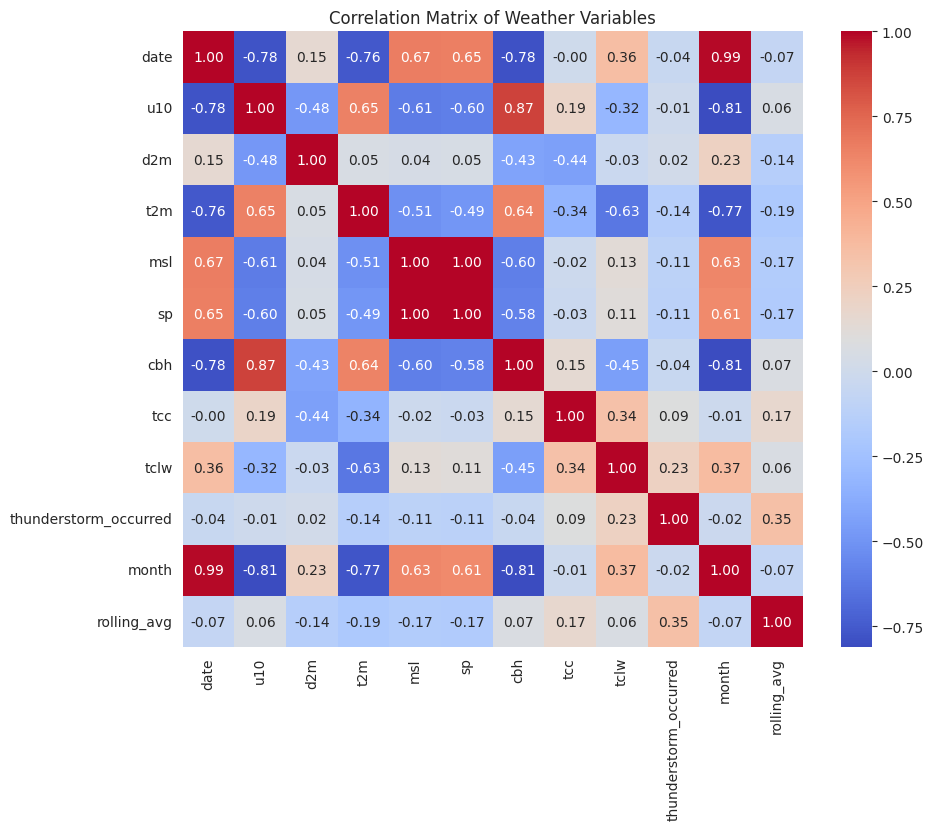

In [ ]:
# Drop the 'day_of_week' column
df_numeric = df.drop(columns=['day_of_week'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Variables')
plt.show()


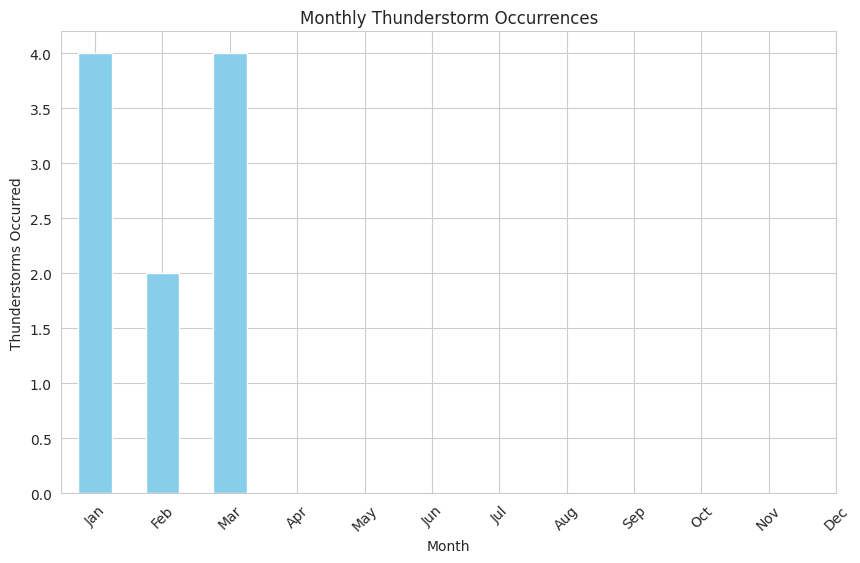

In [ ]:
# Convert date to datetime to extract month
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['month'] = df['date'].dt.month

monthly_thunderstorm = df.groupby('month')['thunderstorm_occurred'].sum()
monthly_thunderstorm.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Monthly Thunderstorm Occurrences')
plt.xlabel('Month')
plt.ylabel('Thunderstorms Occurred')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


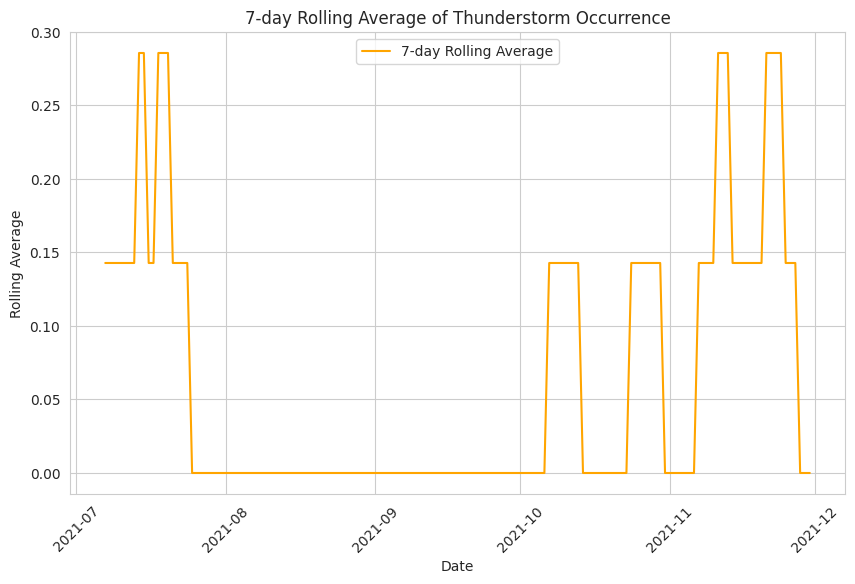

In [ ]:
# Calculate rolling average of thunderstorm occurrences
df['rolling_avg'] = df['thunderstorm_occurred'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['rolling_avg'], color='orange', label='7-day Rolling Average')
plt.title('7-day Rolling Average of Thunderstorm Occurrence')
plt.xlabel('Date')
plt.ylabel('Rolling Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()


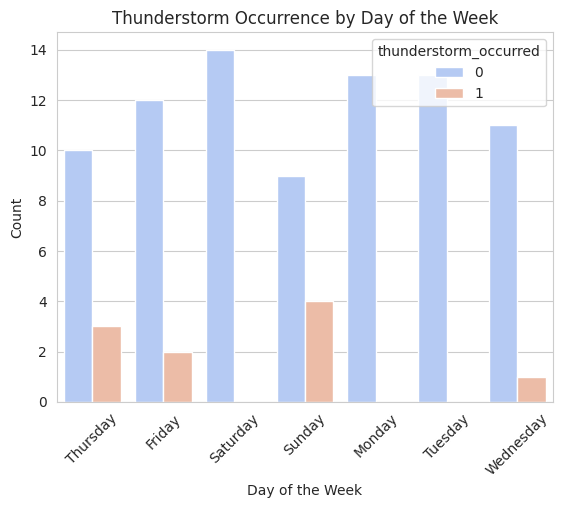

In [ ]:
# Extract the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Plot thunderstorm occurrence by day of the week
sns.countplot(data=df, x='day_of_week', hue='thunderstorm_occurred', palette='coolwarm')
plt.title('Thunderstorm Occurrence by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()



Saving updated_normalized_data.csv to updated_normalized_data (3).csv


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame (replace 'your_file.csv' with the actual file name)
data = pd.read_csv('updated_normalized_data.csv')  # Update with the actual uploaded file name
print(data.head())

         date       u10       d2m       t2m       msl        sp       cbh  \
0  2021-07-01  0.445641  0.798187  0.880697  0.267292  0.277496  0.664986   
1  2021-07-02  0.454224  0.778429  0.805068  0.373861  0.383696  0.524962   
2  2021-07-03  0.459797  0.914012  0.804551  0.382230  0.396520  0.295355   
3  2021-07-04  0.550626  0.831937  0.785664  0.403740  0.412992  0.439555   
4  2021-07-05  0.499422  0.797220  0.869774  0.291246  0.303254  0.449929   

        tcc      tclw  thunderstorm_occurred  
0  0.845228  0.108297                      0  
1  0.824337  0.072462                      1  
2  0.566544  0.051512                      0  
3  0.685793  0.069436                      0  
4  0.637823  0.078215                      0  


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving updated_normalized_data.csv to updated_normalized_data.csv


In [ ]:
# 📌 Load and preprocess data
data = pd.read_csv('updated_normalized_data.csv')
data['date'] = pd.to_datetime(data['date'])

X = data.drop(columns=['date', 'thunderstorm_occurred'])
y = data['thunderstorm_occurred']

# 📌 First split: 70% train, 30% temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 📌 Second split: 15% test, 15% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 📌 Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# 📌 Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# ✅ Print dataset sizes
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Validation samples: {len(X_val)}")


Training samples: 64
Testing samples: 14
Validation samples: 14


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated_normalized_data.csv to updated_normalized_data (1).csv


In [117]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TransformerModel, self).__init__()

        # Transformer Encoder
        self.transformer = nn.Transformer(
            d_model=64,  # Dimensionality of the input features
            nhead=4,     # Number of attention heads
            num_encoder_layers=2,   # Number of encoder layers
            num_decoder_layers=2,   # Number of decoder layers
            batch_first=True  # Ensure the model processes data in batch_first format (batch, seq_len, input_dim)
        )

        # Fully connected layer to produce the output
        self.fc = nn.Linear(64, output_dim)  # Output layer

    def forward(self, x):
        # Transformer requires input shape: (batch, seq_len, input_dim)
        # x already has the correct shape as batch_first=True
        x = self.transformer(x, x)  # Pass through the transformer
        x = x.mean(dim=1)  # Pool over the sequence
        x = self.fc(x)  # Output layer
        return x

# Initialize the model
input_dim = X_train.shape[1]  # Number of features
output_dim = 1  # Binary classification output
model = TransformerModel(input_dim=input_dim, output_dim=output_dim)

# Print the model architecture to check
print(model)


TransformerModel(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-1): 2 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
          )
          (linear1): Linear(in_features=64, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=64, bias=True)
          (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-1): 2 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
  

In [ ]:
import torch
import torch.nn as nn

class ThunderstormTransformer(nn.Module):
    def __init__(self, input_dim=8, d_model=64, nhead=4, num_layers=2):
        super(ThunderstormTransformer, self).__init__()

        self.input_proj = nn.Linear(input_dim, d_model)

        # Set batch_first=True to remove the warning
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.output_proj = nn.Linear(d_model, 1)

    def forward(self, src):
        src = src.unsqueeze(1)  # Shape: [batch, seq, features]
        src = self.input_proj(src)
        memory = self.encoder(src)
        output = self.output_proj(memory[:, -1, :])  # Take last time step
        return torch.sigmoid(output)  # Use if criterion = BCELoss()

# Initialize model, loss function, and optimizer
model = ThunderstormTransformer()
criterion = nn.BCELoss()  # Use BCEWithLogitsLoss() if removing sigmoid in forward()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)  # Ensure X_train_tensor is a torch tensor
    loss = criterion(outputs, y_train_tensor)  # Ensure y_train_tensor is shaped correctly

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.7611
Epoch 10, Loss: 0.3294
Epoch 20, Loss: 0.3124
Epoch 30, Loss: 0.2629
Epoch 40, Loss: 0.1638
Epoch 50, Loss: 0.1388
Epoch 60, Loss: 0.1387
Epoch 70, Loss: 0.1362
Epoch 80, Loss: 0.1333
Epoch 90, Loss: 0.1253


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Data using pandas
df = pd.read_csv("updated_normalized_data.csv")  # Load with pandas

# Drop non-numeric columns (like 'Date' if it exists)
df = df.select_dtypes(include=[np.number])

# Convert to NumPy
data = df.to_numpy()

# Split features and target
X = data[:, :-1]  # Features
y = data[:, -1]   # Target (0 or 1)

# Ensure correct train-test split
train_size_fraction = 64 / 92  # 70%
test_size_fraction = 14 / 92   # 15%

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size_fraction, random_state=42, stratify=y)

val_size_fraction = 14 / (92 - 64)  # 14 out of remaining 28 samples
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=val_size_fraction, random_state=42, stratify=y_temp)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

print("✅ Data Loaded and Processed Successfully!")


✅ Data Loaded and Processed Successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class ThunderstormTransformer(nn.Module):
    def __init__(self, input_dim=8, d_model=64, nhead=4, num_layers=2):
        super(ThunderstormTransformer, self).__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_proj = nn.Linear(d_model, 1)

    def forward(self, src):
        src = src.unsqueeze(1)  # Shape: [batch, seq, features]
        src = self.input_proj(src)
        memory = self.encoder(src)
        output = self.output_proj(memory[:, -1, :])  # Take last time step
        return torch.sigmoid(output)

# Initialize model, loss function, and optimizer
model = ThunderstormTransformer()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)  # Ensure X_train_tensor contains 64 samples
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.7292
Epoch 10, Loss: 0.3322
Epoch 20, Loss: 0.3040
Epoch 30, Loss: 0.2388
Epoch 40, Loss: 0.1651
Epoch 50, Loss: 0.1365
Epoch 60, Loss: 0.1417
Epoch 70, Loss: 0.1365
Epoch 80, Loss: 0.1364
Epoch 90, Loss: 0.1310


In [111]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from imblearn.over_sampling import SMOTE  # For class balancing
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1️⃣ Load and Prepare Data
data = pd.read_csv('updated_normalized_data.csv')
data['date'] = pd.to_datetime(data['date'])

X = data.drop(columns=['date', 'thunderstorm_occurred'])
y = data['thunderstorm_occurred']

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split with 15% test size (14 samples out of 92)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=14/92, random_state=42, stratify=y_resampled)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 2️⃣ Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]

# 3️⃣ Define the Transformer Model
class ThunderstormTransformer(nn.Module):
    def __init__(self):
        super(ThunderstormTransformer, self).__init__()
        self.embedding = nn.Linear(X_train.shape[1], 16)  # Increase feature space
        self.pos_encoder = PositionalEncoding(d_model=16)
        encoder_layer = nn.TransformerEncoderLayer(d_model=16, nhead=2, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=2)  # Increase layers
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.pos_encoder(x)
        x = self.encoder(x)
        x = x.mean(dim=1)  # Pooling
        x = self.dropout(x)
        x = self.fc(x)
        return x  # No sigmoid

# 4️⃣ Custom Focal Loss (for handling class imbalance)
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.bce = nn.BCEWithLogitsLoss(reduction='none')

    def forward(self, logits, targets):
        bce_loss = self.bce(logits, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()

# 5️⃣ Initialize Model, Loss, and Optimizer
model = ThunderstormTransformer()
criterion = FocalLoss(alpha=0.25, gamma=2)
optimizer = Adam(model.parameters(), lr=0.0005)

# 6️⃣ Training Loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 7️⃣ Evaluation
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    probs = torch.sigmoid(logits)
    predictions = (probs > 0.5).float()

accuracy = accuracy_score(y_test_tensor, predictions)
r2 = r2_score(y_test_tensor, probs)

print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")
print("📊 Confusion Matrix:\n", confusion_matrix(y_test_tensor, predictions))
print("🧾 Classification Report:\n", classification_report(y_test_tensor, predictions))
print(f"📈 R² Score: {r2:.2f}")

print("\n📌 Predictions vs Actuals")
print("Predictions:", predictions.view(-1).numpy())
print("Actual     :", y_test_tensor.view(-1).numpy())


Epoch 0, Loss: 0.0589
Epoch 10, Loss: 0.0414
Epoch 20, Loss: 0.0366
Epoch 30, Loss: 0.0339
Epoch 40, Loss: 0.0310
Epoch 50, Loss: 0.0274
Epoch 60, Loss: 0.0222
Epoch 70, Loss: 0.0173
Epoch 80, Loss: 0.0156
Epoch 90, Loss: 0.0121

✅ Accuracy: 96.00%
📊 Confusion Matrix:
 [[12  1]
 [ 0 12]]
🧾 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

📈 R² Score: 0.79

📌 Predictions vs Actuals
Predictions: [1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1.]
Actual     : [1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1.]


In [112]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from imblearn.over_sampling import SMOTE  # For class balancing
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1️⃣ Load and Prepare Data
data = pd.read_csv('updated_normalized_data.csv')
data['date'] = pd.to_datetime(data['date'])

X = data.drop(columns=['date', 'thunderstorm_occurred'])
y = data['thunderstorm_occurred']

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split with 15% test size (14 samples out of 92)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=14/92, random_state=42, stratify=y_resampled)

# Further split training data: 14 samples for validation
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=14/78, random_state=42, stratify=y_train)

# Standardize data
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_final_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 2️⃣ Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]

# 3️⃣ Define the Transformer Model
class ThunderstormTransformer(nn.Module):
    def __init__(self):
        super(ThunderstormTransformer, self).__init__()
        self.embedding = nn.Linear(X_train_final.shape[1], 16)  # Increase feature space
        self.pos_encoder = PositionalEncoding(d_model=16)
        encoder_layer = nn.TransformerEncoderLayer(d_model=16, nhead=2, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=2)  # Increase layers
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.pos_encoder(x)
        x = self.encoder(x)
        x = x.mean(dim=1)  # Pooling
        x = self.dropout(x)
        x = self.fc(x)
        return x  # No sigmoid

# 4️⃣ Custom Focal Loss (for handling class imbalance)
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.bce = nn.BCEWithLogitsLoss(reduction='none')

    def forward(self, logits, targets):
        bce_loss = self.bce(logits, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()

# 5️⃣ Initialize Model, Loss, and Optimizer
model = ThunderstormTransformer()
criterion = FocalLoss(alpha=0.25, gamma=2)
optimizer = Adam(model.parameters(), lr=0.0005)

# 6️⃣ Training Loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 7️⃣ Validation
model.eval()
with torch.no_grad():
    val_logits = model(X_val_tensor)
    val_probs = torch.sigmoid(val_logits)
    val_predictions = (val_probs > 0.5).float()

val_accuracy = accuracy_score(y_val_tensor, val_predictions)
print(f"\n🔍 Validation Accuracy: {val_accuracy * 100:.2f}%")

# 8️⃣ Testing
with torch.no_grad():
    logits = model(X_test_tensor)
    probs = torch.sigmoid(logits)
    predictions = (probs > 0.5).float()

accuracy = accuracy_score(y_test_tensor, predictions)
r2 = r2_score(y_test_tensor, probs)

print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")
print("📊 Confusion Matrix:\n", confusion_matrix(y_test_tensor, predictions))
print("🧾 Classification Report:\n", classification_report(y_test_tensor, predictions))
print(f"📈 R² Score: {r2:.2f}")

print("\n📌 Predictions vs Actuals")
print("Predictions:", predictions.view(-1).numpy())
print("Actual     :", y_test_tensor.view(-1).numpy())


Epoch 0, Loss: 0.0673
Epoch 10, Loss: 0.0406
Epoch 20, Loss: 0.0350
Epoch 30, Loss: 0.0317
Epoch 40, Loss: 0.0263
Epoch 50, Loss: 0.0245
Epoch 60, Loss: 0.0200
Epoch 70, Loss: 0.0152
Epoch 80, Loss: 0.0141
Epoch 90, Loss: 0.0087

🔍 Validation Accuracy: 92.00%

✅ Test Accuracy: 84.00%
📊 Confusion Matrix:
 [[10  3]
 [ 1 11]]
🧾 Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        13
         1.0       0.79      0.92      0.85        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25

📈 R² Score: 0.58

📌 Predictions vs Actuals
Predictions: [1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1.]
Actual     : [1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1.]


In [114]:
pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 27.2 MB/s eta 0:00:00


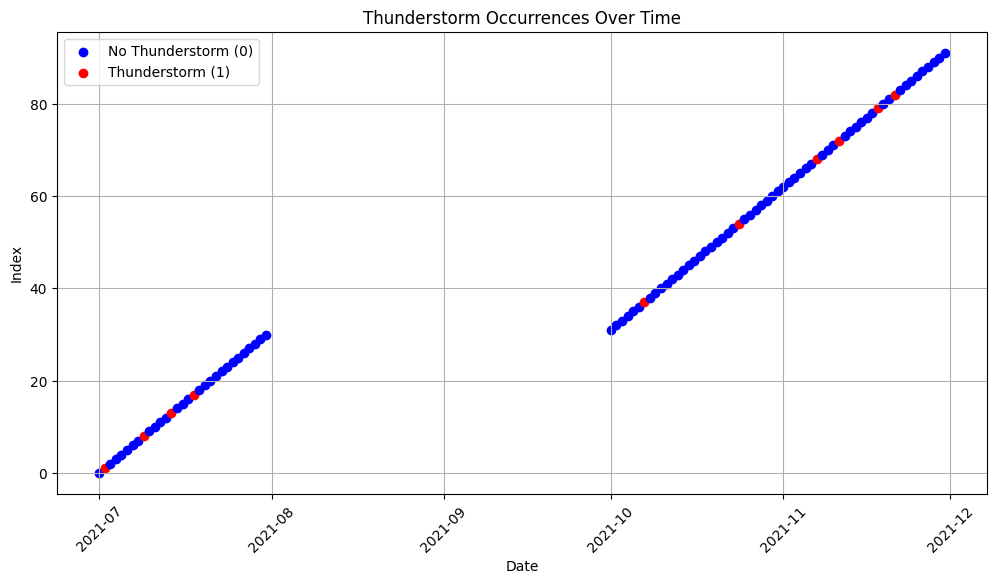

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
data = pd.read_csv('updated_normalized_data.csv')  # Update file path if needed
data['date'] = pd.to_datetime(data['date'])  # Convert to datetime if not already

# Define colors
colors = {0: 'blue', 1: 'red'}  # Blue for no thunderstorm, Red for thunderstorm

# Scatter plot
plt.figure(figsize=(12, 6))
for idx, row in data.iterrows():
    plt.scatter(row['date'], idx, color=colors[row['thunderstorm_occurred']], label=row['thunderstorm_occurred'] if idx == 0 else "")

# Formatting
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Thunderstorm Occurrences Over Time')
plt.xticks(rotation=45)
plt.legend(['No Thunderstorm (0)', 'Thunderstorm (1)'])
plt.grid(True)
plt.show()
